In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [46]:
#load the data as panda
data=pd.read_csv('Data gathered1.csv')
data



,COUNTY,Division,FILE NAME,File Number,LOCATION,LATITUDE,LONGITUDE,CONTAMINANTS,DATE,ENF-STATUS,ACT-STATUS,Category
0,HIDALGO,REM/VCIOP,MCDONALDS 42-1615,1087,"3318 US BUSINESS HWY 83, WESLACO",26.152818,-97.956884,PAH,3/20/2018,NaN,0,Other Business Establishments
1,HIDALGO,REM/DCRP,PRIDE'S CLEANERS,DC0025,"2204 WEST NOLANA, MCALLEN",26.241222,-98.237745,CHLORINATED SOLVENTS,4/29/2005,5B,0,Other Business Establishments
2,HIDALGO,REM/PST,STRIPES 9625,120410,"721 N MCCOLL RD, MCALLEN",26.208402,-98.211955,"DIESEL, GASOLINE",12/11/2017,2,2A,Gas Station
3,HIDALGO,REM/PST,7-ELEVEN STORE 36529,120290,"822 W US HIGHWAY 83, SAN JUAN",26.191568,-98.167134,GASOLINE,8/22/2016,2,2A,Supermarket/Convenience stores
4,HIDALGO,REM/PST,7-ELEVEN STORE 40672,120511,"6400 S 23RD ST, MCALLEN",26.150070,-98.254685,GASOLINE,3/7/2018,2,6,Supermarket/Convenience stores
5,HIDALGO,REM/PST,ECONOMY DRIVE INN FFP 290,116761,"2015 S MCCOLL RD, EDINBURG",26.286891,-98.198046,GASOLINE,10/13/2005,1B,1A,Other Business Establishments
6,HIDALGO,REM/PST,FFP 297 FORMER ECONOMY DRIVE IN 114691,NaN,"1525 N TEXAS BLVD, WESLACO",26.176380,-97.991150,GASOLINE,7/9/1999,5B,6,Supermarket/Convenience stores
7,HIDALGO,REM/PST,FORMER GINOS MEAT MARKET,120247,"700 W STATE AVE, PHARR",26.197261,-98.191799,GASOLINE,4/24/2017,2,6,Supermarket/Convenience stores
8,HIDALGO,REM/PST,HOP SHOP 1,113110,"1417 N CONWAY AVE, MISSION",26.220368,-98.325309,GASOLINE,3/25/1998,2,6,Supermarket/Convenience stores
9,HIDALGO,REM/PST,SAN JUANITA TREVINO PROPERTY,120715,"723 E UNIVERSITY DR, EDINBURG",26.300645,-98.154873,GASOLINE,11/18/2017,2,6,Other Business Establishments


In [18]:
#split the  contaminants that has more than 1 types of contaminants in each rows to get the bettercoun 
data['CONTAMINANTS'] = data['CONTAMINANTS'].str.split(pat=', ')
data_long = data.explode('CONTAMINANTS')
data_long['CONTAMINANTS'].value_counts()

GASOLINE                                                17
UNKNOWN                                                  7
DIESEL                                                   5
TPH                                                      4
BTEX                                                     3
CHLORIDE                                                 3
PESTICIDES                                               3
PSH                                                      3
VOCS                                                     2
CHLORINATED SOLVENTS                                     2
BENZENE                                                  2
HERBICIDES                                               2
METALS                                                   2
SVOCS                                                    2
VOCS (1,1-DCA; CIS-1,2-DCE; DICHLORODIFLUOROMETHANE)     1
PCBS                                                     1
OTHER                                                   

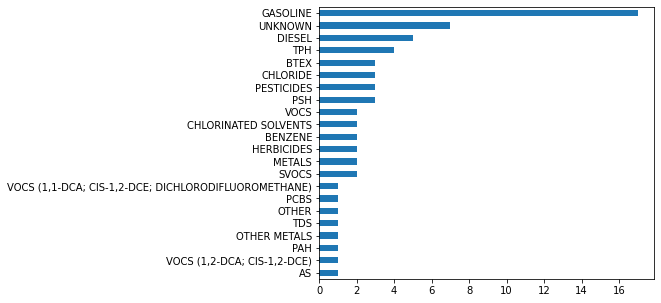

In [67]:
data_long['CONTAMINANTS'].value_counts().plot(kind = 'barh',  figsize= (6,5) ).invert_yaxis()
plt.savefig('contaminants.png')

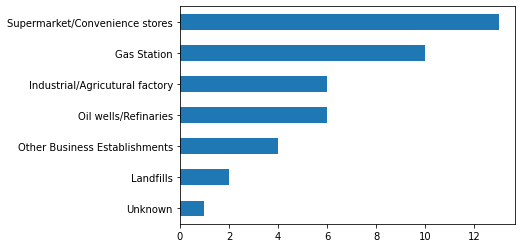

In [68]:
data['Category'].value_counts().plot(kind = 'barh').invert_yaxis()
plt.savefig('sources.png')

In [21]:
data3=pd.read_csv('Data gathered1.csv')
data2=pd.read_csv('Data gathered1.csv', parse_dates=["DATE"])
#dont delete this

In [22]:
data2['Date_date'] = pd.to_datetime(data2['DATE'])
data2['YEAR'] =data2['Date_date'].dt.year
data2['DUMMY'] = 1


In [23]:
data3 = data2.groupby('YEAR').count()
data3 = data3.reset_index()
print(data3[['YEAR','DUMMY']])

      YEAR  DUMMY
0   1989.0      1
1   1991.0      1
2   1992.0      1
3   1995.0      1
4   1996.0      2
5   1998.0      1
6   1999.0      1
7   2001.0      1
8   2002.0      1
9   2003.0      1
10  2005.0      3
11  2006.0      1
12  2007.0      1
13  2009.0      1
14  2010.0      2
15  2011.0      1
16  2012.0      2
17  2013.0      1
18  2014.0      1
19  2015.0      2
20  2016.0      1
21  2017.0      5
22  2018.0      3


Text(0.5, 0, 'Year')

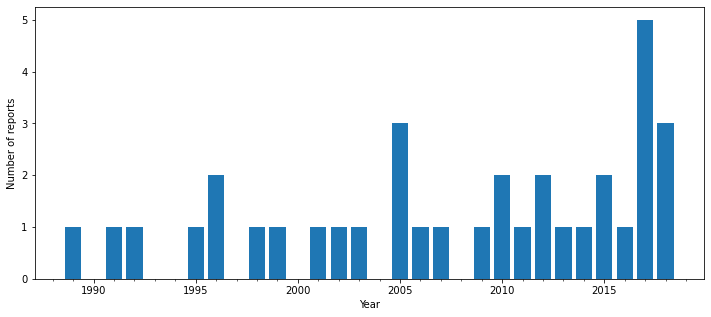

In [39]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(data3['YEAR'], data3['DUMMY'])
#ax[1].plot(data3['YEAR'], data3['DUMMY'])
#ax.set_xlim([datetime.date(1985), datetime.date(2020)])
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.set_ylabel("Number of reports")
ax.set_xlabel("Year")
plt.savefig('sources.png')

(array([2., 1., 2., 2., 3., 2., 2., 3., 3., 3.]),
 array([1989. , 1991.9, 1994.8, 1997.7, 2000.6, 2003.5, 2006.4, 2009.3,
        2012.2, 2015.1, 2018. ]),
 <BarContainer object of 10 artists>)

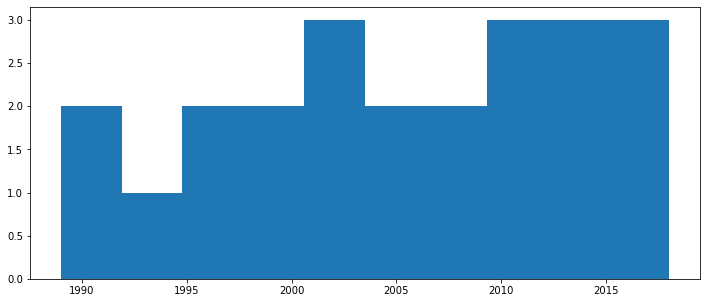

In [44]:
fig, ax = plt.subplots(figsize=(12,5))
ax.hist(data3['YEAR'])

In [58]:

ACT = {'0': 'No Activity', 
         '1A' : 'Contamination confirmed',
         '1B' : 'Contamination confirmed', 
         '2A' :'Investigation',
         '2B': 'Investigation',
         '3':'Corrective Action Planning',
         '4': 'Implement Action',
        '5': 'Monitor Action',
         '6':'Inactive'
          }


data['STATUS'] = data['ACT-STATUS'].apply(lambda x: ACT[x])
data

,COUNTY,Division,FILE NAME,File Number,LOCATION,LATITUDE,LONGITUDE,CONTAMINANTS,DATE,ENF-STATUS,ACT-STATUS,Category,STATUS,COLOR
0,HIDALGO,REM/VCIOP,MCDONALDS 42-1615,1087,"3318 US BUSINESS HWY 83, WESLACO",26.152818,-97.956884,PAH,3/20/2018,NaN,0,Other Business Establishments,No Activity,black
1,HIDALGO,REM/DCRP,PRIDE'S CLEANERS,DC0025,"2204 WEST NOLANA, MCALLEN",26.241222,-98.237745,CHLORINATED SOLVENTS,4/29/2005,5B,0,Other Business Establishments,No Activity,black
2,HIDALGO,REM/PST,STRIPES 9625,120410,"721 N MCCOLL RD, MCALLEN",26.208402,-98.211955,"DIESEL, GASOLINE",12/11/2017,2,2A,Gas Station,Investigation,red
3,HIDALGO,REM/PST,7-ELEVEN STORE 36529,120290,"822 W US HIGHWAY 83, SAN JUAN",26.191568,-98.167134,GASOLINE,8/22/2016,2,2A,Supermarket/Convenience stores,Investigation,red
4,HIDALGO,REM/PST,7-ELEVEN STORE 40672,120511,"6400 S 23RD ST, MCALLEN",26.150070,-98.254685,GASOLINE,3/7/2018,2,6,Supermarket/Convenience stores,Inactive,gray
5,HIDALGO,REM/PST,ECONOMY DRIVE INN FFP 290,116761,"2015 S MCCOLL RD, EDINBURG",26.286891,-98.198046,GASOLINE,10/13/2005,1B,1A,Other Business Establishments,Contamination confirmed,lightblue
6,HIDALGO,REM/PST,FFP 297 FORMER ECONOMY DRIVE IN 114691,NaN,"1525 N TEXAS BLVD, WESLACO",26.176380,-97.991150,GASOLINE,7/9/1999,5B,6,Supermarket/Convenience stores,Inactive,gray
7,HIDALGO,REM/PST,FORMER GINOS MEAT MARKET,120247,"700 W STATE AVE, PHARR",26.197261,-98.191799,GASOLINE,4/24/2017,2,6,Supermarket/Convenience stores,Inactive,gray
8,HIDALGO,REM/PST,HOP SHOP 1,113110,"1417 N CONWAY AVE, MISSION",26.220368,-98.325309,GASOLINE,3/25/1998,2,6,Supermarket/Convenience stores,Inactive,gray
9,HIDALGO,REM/PST,SAN JUANITA TREVINO PROPERTY,120715,"723 E UNIVERSITY DR, EDINBURG",26.300645,-98.154873,GASOLINE,11/18/2017,2,6,Other Business Establishments,Inactive,gray


In [59]:

color = { 'No Activity': 'black', 
          'Contamination confirmed':'lightblue',
         'Investigation':'red',
         'Corrective Action Planning':'pink',
         'Implement Action':'yellow',
         'Monitor Action':'green',
         'Inactive':'gray'
          }


data['COLOR'] = data['STATUS'].apply(lambda x: color[x])
data

,COUNTY,Division,FILE NAME,File Number,LOCATION,LATITUDE,LONGITUDE,CONTAMINANTS,DATE,ENF-STATUS,ACT-STATUS,Category,STATUS,COLOR
0,HIDALGO,REM/VCIOP,MCDONALDS 42-1615,1087,"3318 US BUSINESS HWY 83, WESLACO",26.152818,-97.956884,PAH,3/20/2018,NaN,0,Other Business Establishments,No Activity,black
1,HIDALGO,REM/DCRP,PRIDE'S CLEANERS,DC0025,"2204 WEST NOLANA, MCALLEN",26.241222,-98.237745,CHLORINATED SOLVENTS,4/29/2005,5B,0,Other Business Establishments,No Activity,black
2,HIDALGO,REM/PST,STRIPES 9625,120410,"721 N MCCOLL RD, MCALLEN",26.208402,-98.211955,"DIESEL, GASOLINE",12/11/2017,2,2A,Gas Station,Investigation,red
3,HIDALGO,REM/PST,7-ELEVEN STORE 36529,120290,"822 W US HIGHWAY 83, SAN JUAN",26.191568,-98.167134,GASOLINE,8/22/2016,2,2A,Supermarket/Convenience stores,Investigation,red
4,HIDALGO,REM/PST,7-ELEVEN STORE 40672,120511,"6400 S 23RD ST, MCALLEN",26.150070,-98.254685,GASOLINE,3/7/2018,2,6,Supermarket/Convenience stores,Inactive,gray
5,HIDALGO,REM/PST,ECONOMY DRIVE INN FFP 290,116761,"2015 S MCCOLL RD, EDINBURG",26.286891,-98.198046,GASOLINE,10/13/2005,1B,1A,Other Business Establishments,Contamination confirmed,lightblue
6,HIDALGO,REM/PST,FFP 297 FORMER ECONOMY DRIVE IN 114691,NaN,"1525 N TEXAS BLVD, WESLACO",26.176380,-97.991150,GASOLINE,7/9/1999,5B,6,Supermarket/Convenience stores,Inactive,gray
7,HIDALGO,REM/PST,FORMER GINOS MEAT MARKET,120247,"700 W STATE AVE, PHARR",26.197261,-98.191799,GASOLINE,4/24/2017,2,6,Supermarket/Convenience stores,Inactive,gray
8,HIDALGO,REM/PST,HOP SHOP 1,113110,"1417 N CONWAY AVE, MISSION",26.220368,-98.325309,GASOLINE,3/25/1998,2,6,Supermarket/Convenience stores,Inactive,gray
9,HIDALGO,REM/PST,SAN JUANITA TREVINO PROPERTY,120715,"723 E UNIVERSITY DR, EDINBURG",26.300645,-98.154873,GASOLINE,11/18/2017,2,6,Other Business Establishments,Inactive,gray


In [26]:
x=data['LONGITUDE']
y= data["LATITUDE"]


In [28]:
import cartopy.io.shapereader as shpreader

reader = shpreader.Reader('cb_2018_us_county_5m')

counties = list(reader.geometries())

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())


In [29]:
reader2 = shpreader.Reader('City')

city = list(reader2.geometries())

Cities = cfeature.ShapelyFeature(city, ccrs.PlateCarree())


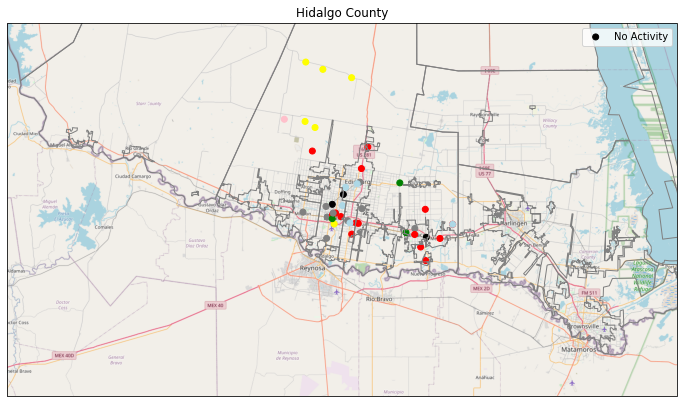

In [66]:

import matplotlib.pyplot as plt 
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.OSM() # spoofed, downloaded street map

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
center_pt = [26.2271, -98.2087] # lat/lon hidalgo
zoom = 0.5 # for zooming out of center point
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
ax1.set_extent(extent) # set extents
ax1.scatter(x,y,c=data['COLOR'] ,transform=ccrs.PlateCarree())
scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification
ax1.set_title("Hidalgo County")
ax1.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
ax1.add_feature(Cities, facecolor='none', edgecolor='gray')
ax1.legend(data['STATUS'])
plt.show()




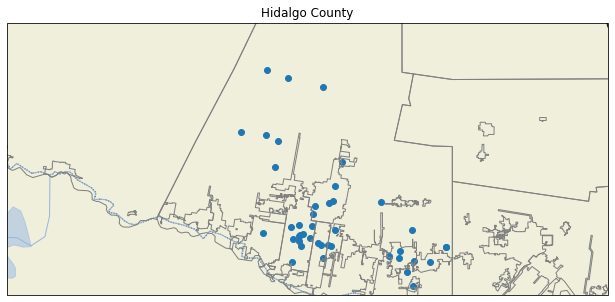

In [31]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')


def main():
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-97.47985829058389,-98.95372372240843, 26.736656769310226, 26.069979412504864])
#Right=26.736656769310226, -97.47985829058389
#left=26.069979412504864, -98.95372372240843
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(states_provinces, edgecolor='gray')
    #ax.stock_img() #added stock image for nice sea and land rendering
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
    ax.add_feature(Cities, facecolor='none', edgecolor='gray')
    ax.set_title("Hidalgo County") #title
    ax.scatter(x,y, transform=ccrs.PlateCarree())
    plt.show()


if __name__ == '__main__':
    main()